In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Input, Dropout, BatchNormalization

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import joblib
from tensorflow.keras.models import load_model

# 1 - Load dataset

In [74]:
data = pd.read_csv('./Data/final_dataset.csv')
data.head()

,id,seen_by_model,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,createdAt,updatedAt,deletedAt
0,15195,1,0.514968,0.154703,0.119834,0.002413,2926.867063,744776.204049,3026.757776,143256.463037,...,6.642057,146.515152,7.042427,112.527679,10.134043,111.212082,7,2021-11-23 00:52:25,2021-11-23 00:52:25,NaN
1,15196,1,0.353071,0.089672,0.115684,0.001929,2571.077081,768422.807371,2504.260526,136867.750979,...,4.723323,100.448593,-4.376332,77.169662,3.271257,84.937950,7,2021-11-23 00:52:25,2021-11-23 00:52:25,NaN
2,15197,1,0.246922,0.071203,0.142179,0.000467,2157.290460,255102.946465,2583.825093,128457.268251,...,-0.330528,51.709942,-3.030965,52.976002,3.077600,42.835842,7,2021-11-23 00:52:25,2021-11-23 00:52:25,NaN
3,15198,1,0.196268,0.059665,0.175184,0.004511,1789.064529,519864.355368,1920.455324,265704.613172,...,-0.877409,38.965206,-4.683223,47.049496,-1.194212,41.838902,7,2021-11-23 00:52:25,2021-11-23 00:52:25,NaN
4,15199,1,0.228941,0.065195,0.104522,0.001217,1967.592425,479578.810131,2381.893832,261899.758287,...,2.810957,101.239632,-4.355564,105.928963,-0.081612,78.802841,7,2021-11-23 00:52:25,2021-11-23 00:52:25,NaN


In [4]:
data.columns

Index(['id', 'seen_by_model', 'chroma_stft_mean', 'chroma_stft_var',
       'rms_mean', 'rms_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'spectral_bandwidth_mean',
       'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var',
       'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean',
       'harmony_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean',
       'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var',
       'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean',
       'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var',
       'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean',
       'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean',
       'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean', 'mfcc20_var', 'label', 'createdAt', 'upda

In [75]:
drop_layers = ['id', 'seen_by_model', 'createdAt', 'updatedAt', 'deletedAt']
data = data.drop(columns=drop_layers)
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.514968,0.154703,0.119834,0.002413,2926.867063,744776.204049,3026.757776,143256.463037,6760.151775,2.644778e+06,...,113.660576,0.531954,118.662720,6.642057,146.515152,7.042427,112.527679,10.134043,111.212082,7
1,0.353071,0.089672,0.115684,0.001929,2571.077081,768422.807371,2504.260526,136867.750979,5252.178063,2.112718e+06,...,111.430519,-0.187333,105.414642,4.723323,100.448593,-4.376332,77.169662,3.271257,84.937950,7
2,0.246922,0.071203,0.142179,0.000467,2157.290460,255102.946465,2583.825093,128457.268251,4928.880250,2.100616e+06,...,37.640495,-3.717362,34.108440,-0.330528,51.709942,-3.030965,52.976002,3.077600,42.835842,7
3,0.196268,0.059665,0.175184,0.004511,1789.064529,519864.355368,1920.455324,265704.613172,3679.929488,2.301348e+06,...,85.278725,-13.391407,51.326485,-0.877409,38.965206,-4.683223,47.049496,-1.194212,41.838902,7
4,0.228941,0.065195,0.104522,0.001217,1967.592425,479578.810131,2381.893832,261899.758287,4322.678115,3.567348e+06,...,60.897854,-5.820096,65.250710,2.810957,101.239632,-4.355564,105.928963,-0.081612,78.802841,7


In [228]:
corr = data.corr().label
d = corr[(corr < -0.1) | (corr >= 0.1)]
not_d_cols = list(corr[(corr > -0.1) & (corr < 0.1)].index) + ['label']
print(len(d))
print(not_d_cols)
print(d.index)
pd.DataFrame(data=d)

36
['tempo', 'mfcc1_var', 'mfcc2_var', 'mfcc3_mean', 'mfcc9_var', 'mfcc10_var', 'mfcc11_var', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_var', 'label']
Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc14_mean', 'mfcc16_mean', 'mfcc18_mean', 'mfcc20_mean', 'label'],
      dtype='object')


,label
chroma_stft_mean,0.168137
chroma_stft_var,0.101342
rms_mean,0.250687
rms_var,0.149902
spectral_centroid_mean,0.297947
spectral_centroid_var,0.166563
spectral_bandwidth_mean,0.378827
spectral_bandwidth_var,0.165110
rolloff_mean,0.316482
rolloff_var,0.249841


AttributeError: 'numpy.float64' object has no attribute 'values'

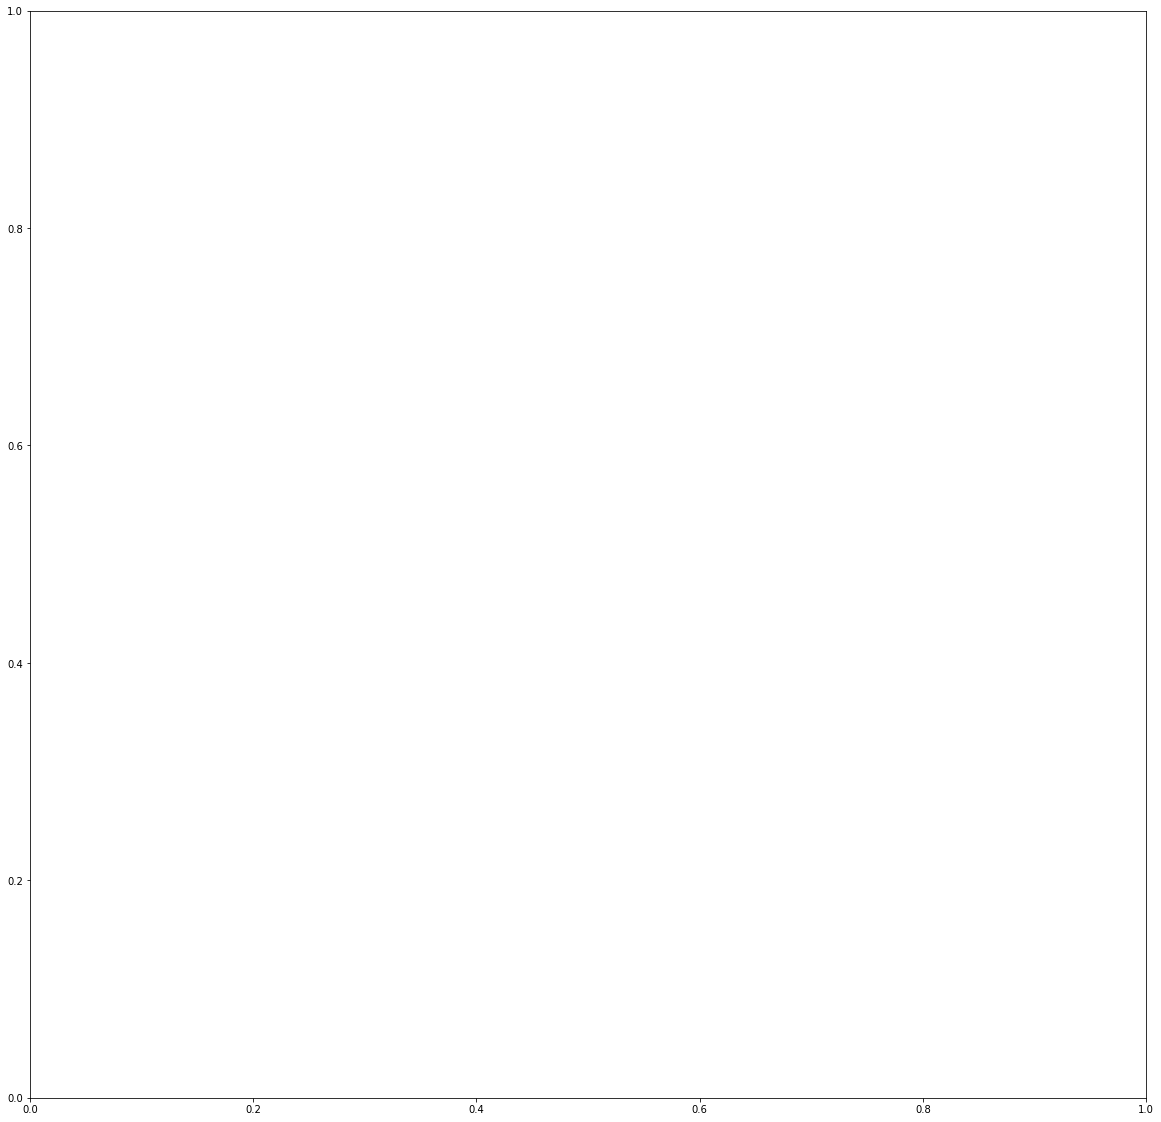

In [190]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr.label.values.reshape(56,1),  annot=True, ax=ax)

# 2 - Pre-process data

In [220]:
data = data.sample(frac=1)

X = data.drop(columns=not_d_cols)
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [221]:
X_train.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc14_mean,mfcc16_mean,mfcc18_mean,mfcc20_mean
1716,0.414032,0.054565,0.116593,0.000217,2353.795011,1.262240e+05,2160.088581,79325.476045,4528.367668,7.429512e+05,...,9.481945,24.183241,-10.032646,1.806884,-4.187940,-4.834543,4.386966,3.666962,5.713211,-7.536683
779,0.462657,0.112877,0.100116,0.002143,2677.523624,2.916005e+05,2534.247508,67044.239226,5657.661767,1.258448e+06,...,5.795778,260.684814,-11.170466,8.662375,-1.947484,1.313204,3.211410,-3.304425,-1.976384,2.052995
1,0.353071,0.089672,0.115684,0.001929,2571.077081,7.684228e+05,2504.260526,136867.750979,5252.178063,2.112718e+06,...,4.290030,107.836388,-0.082475,6.660373,-7.251233,0.790672,4.115472,2.131614,4.723323,3.271257
2761,0.533258,0.099348,0.219548,0.005921,3081.433991,1.135337e+06,2773.686400,129072.575924,6309.178555,2.779563e+06,...,6.547644,89.135750,-3.210121,10.924068,-3.263280,4.481433,2.619546,1.942045,2.286898,5.458716
771,0.495175,0.100544,0.140656,0.002899,2001.822510,6.521444e+05,2256.902631,230606.704292,4258.353291,2.725135e+06,...,-0.301350,155.470688,2.841107,5.693928,-10.844552,4.772921,5.494956,-0.317107,2.538990,9.015543


In [213]:
count = []
tdf = pd.DataFrame(data=y_test, columns=['label'])

for i in range(10):
    count.append(len(tdf[tdf.label == i]))
    
count

[245, 710, 241, 573, 404, 477, 306, 307, 294, 48]

## 2.1 - Scale data

In [222]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

X_train.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc14_mean,mfcc16_mean,mfcc18_mean,mfcc20_mean
0,0.255885,-0.750329,-0.247227,-0.664740,0.286753,-0.773675,-0.086340,-0.552187,0.067747,-0.757909,...,0.586615,-1.113537,-1.002719,-0.364793,-0.117443,-1.286832,0.486285,0.249581,0.770316,-2.018953
1,0.605629,0.946759,-0.427417,-0.179023,0.675049,-0.417352,0.473779,-0.640894,0.671879,-0.444672,...,0.128940,3.086251,-1.178149,0.581566,0.270157,-0.255041,0.263562,-1.228498,-0.909808,0.064961
2,-0.182590,0.271405,-0.257167,-0.233237,0.547372,0.610018,0.428889,-0.136563,0.454960,0.074416,...,-0.058014,0.371973,0.531413,0.305201,-0.647395,-0.342739,0.434847,-0.075944,0.554032,0.329698
3,1.113437,0.553014,0.878700,0.773637,1.159520,1.400578,0.832221,-0.192867,1.020417,0.479617,...,0.222292,0.039888,0.049188,0.893779,0.042524,0.276690,0.151427,-0.116137,0.021690,0.805051
4,0.839516,0.587810,0.015932,0.011601,-0.135420,0.359482,0.058592,0.540509,-0.076701,0.446544,...,-0.628082,1.217862,0.982175,0.171790,-1.269041,0.325611,0.696206,-0.595124,0.076770,1.577978


In [223]:
X_test.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc14_mean,mfcc16_mean,mfcc18_mean,mfcc20_mean
0,1.038016,0.437375,-0.018693,-0.420876,0.399244,1.272321,0.839106,0.383064,0.647317,1.180482,...,0.088448,0.148624,-0.852598,0.274901,0.151997,0.696389,0.877523,0.104179,-0.145860,0.493358
1,-0.804889,0.660655,-0.878917,-0.633717,-1.700373,-1.021189,-2.176274,-1.018944,-1.669184,-1.179531,...,-1.511542,-0.914680,-0.964445,-1.455015,0.119247,-1.286048,-0.546930,-1.381066,-1.673007,-0.836715
2,-1.025851,-0.406330,-0.731424,-0.505002,1.414666,0.245237,0.270836,-0.451969,0.860895,-0.384619,...,1.552458,0.468918,-1.405738,1.571759,-0.021693,-0.235660,-1.539155,-1.170925,0.308637,0.909053
3,-0.717744,-0.664326,-0.175440,-0.534129,0.348697,-0.076541,0.637386,0.040909,0.488984,0.275458,...,0.286607,-0.630285,0.885885,0.356427,-0.291013,0.290349,0.041648,0.068601,0.627952,1.063232
4,-1.784929,-0.545532,-1.052454,-0.538131,-1.900019,-1.035448,-2.675120,-1.086872,-1.926208,-1.201716,...,-1.224558,-0.747721,-0.056967,-2.124992,-1.764973,-2.225508,-0.102940,-0.209421,-0.592426,1.118572


# 3 - Movel evaluation (Revision)

## 3.1 - KNN

In [224]:
knn_model = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1)
knn_acc = cross_val_score(knn_model, X_train, y_train, cv=5)
print(knn_acc)
print(sum(knn_acc) / 5)

[0.90963139 0.89298454 0.90130797 0.90309156 0.89530042]
0.900463174841429


0.9137309292649098


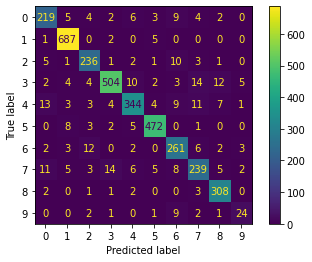

In [252]:
knn_model = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1)
knn_model.fit(X_train, y_train)
preds = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, preds)
print(knn_acc)
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 3.2 - SVM

In [245]:
svm_model = SVC(kernel='poly', gamma=10, C=1)
svm_acc = cross_val_score(svm_model, X_train, y_train, cv=5)
print(sum(svm_acc) / 5)


0.8674046010492876


## 3.3 - Neural Network

In [225]:
_X_test, X_val, _y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [226]:
# Define model
nn_model = keras.Sequential([
    Dense(600, activation='relu', input_shape=[len(X_train.columns)]),
    Dropout(0.5),
    #BatchNormalization(),
    #Dense(600, activation='relu'),
    #Dropout(0.3),
    #BatchNormalization(),
    #Dense(400, activation='relu'),
    #Dropout(0.4),
    #BatchNormalization(),
    Dense(300, activation='relu'),
    Dropout(0.5),
    #BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    #BatchNormalization(),
    Dense(10, activation='softmax')
])
nn_model.compile(metrics=['accuracy'],
                    loss='sparse_categorical_crossentropy',
                    optimizer='adam')
nn_model.summary()

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1)

nn_prediction_distributions = nn_model.predict(_X_test)
nn_prediction = []
for i in range(len(nn_prediction_distributions)):
    nn_prediction.append(np.argmax(nn_prediction_distributions[i]))
    
nn_acc = accuracy_score(_y_test, nn_prediction)
print("Accuracy: " + str(nn_acc))

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_256 (Dense)            (None, 600)               21600     
_________________________________________________________________
dropout_181 (Dropout)        (None, 600)               0         
_________________________________________________________________
dense_257 (Dense)            (None, 300)               180300    
_________________________________________________________________
dropout_182 (Dropout)        (None, 300)               0         
_________________________________________________________________
dense_258 (Dense)            (None, 128)               38528     
_________________________________________________________________
dropout_183 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_259 (Dense)            (None, 10)              

Epoch 49/1000
263/263 [==============================] - 1s 2ms/step - loss: 0.2229 - accuracy: 0.9231 - val_loss: 0.2800 - val_accuracy: 0.9185
Epoch 50/1000
263/263 [==============================] - 1s 2ms/step - loss: 0.2303 - accuracy: 0.9238 - val_loss: 0.2803 - val_accuracy: 0.9157
Epoch 51/1000
263/263 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9266 - val_loss: 0.2920 - val_accuracy: 0.9163
Epoch 52/1000
263/263 [==============================] - 1s 2ms/step - loss: 0.2363 - accuracy: 0.9209 - val_loss: 0.2732 - val_accuracy: 0.9174
Epoch 53/1000
263/263 [==============================] - 1s 3ms/step - loss: 0.2304 - accuracy: 0.9227 - val_loss: 0.2775 - val_accuracy: 0.9196
Epoch 54/1000
263/263 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.9214 - val_loss: 0.2797 - val_accuracy: 0.9185
Epoch 55/1000
263/263 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.9254 - val_loss: 0.2763 - val_ac

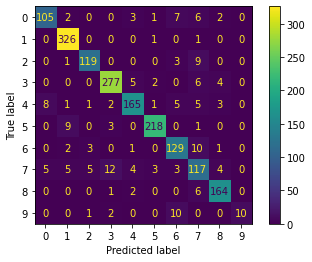

In [227]:
cm = confusion_matrix(_y_test, nn_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# 4 - Train final models

In [236]:
X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc14_mean,mfcc16_mean,mfcc18_mean,mfcc20_mean
5035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2552,0.222058,0.029720,0.260106,0.001125,2361.785928,395973.870836,2451.662615,160860.568466,5195.896965,2.008947e+06,...,12.749134,57.742821,-10.305162,8.566433,-0.597312,-1.269005,3.089840,2.168136,5.157101,7.099347
306,0.432984,0.116189,0.140183,0.001239,2522.644299,721467.302230,2483.697979,225216.839865,5116.209125,3.071948e+06,...,5.278366,57.571690,-6.270730,-0.955436,-11.834300,-4.025055,-6.103829,-4.921802,-1.081177,1.801386
1655,0.209843,0.035562,0.157989,0.000431,2533.643748,60045.283529,2436.029634,29063.936845,5117.657995,3.411328e+05,...,10.422565,40.736332,2.626701,10.140564,2.578638,1.709377,4.367891,7.870467,8.787485,5.467753
7985,0.370385,0.121341,0.045105,0.000420,1705.805875,197029.361958,1804.509314,72157.000897,3373.243717,7.028020e+05,...,-0.161508,109.611710,-5.889575,-3.246834,-10.343292,1.974046,-0.054398,0.725202,-3.010236,5.518209


In [240]:
X = data.drop(columns=not_d_cols)
y = data.label

final_scaler = StandardScaler()
final_scaler.fit(X)
X_scaled = pd.DataFrame(data=final_scaler.transform(X), columns=X.columns)
X_scaled.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc14_mean,mfcc16_mean,mfcc18_mean,mfcc20_mean
0,-2.736809,-2.332314,-1.529310,-0.714814,-2.549474,-1.033718,-3.345250,-1.115573,-2.368844,-1.207840,...,-0.590273,-1.536157,0.539918,-0.625322,0.609383,-0.483359,-0.348074,-0.534782,-0.484362,-0.386716
1,-1.133876,-1.470364,1.323142,-0.433348,0.295622,-0.191458,0.349762,0.028938,0.425400,0.006231,...,0.987438,-0.516000,-1.041746,0.563067,0.506042,-0.696129,0.238023,-0.070234,0.658291,1.161900
2,0.388704,1.037409,0.008011,-0.404780,0.489399,0.500887,0.398044,0.486828,0.382546,0.648638,...,0.062927,-0.519024,-0.422531,-0.757866,-1.438054,-1.158228,-1.505879,-1.589333,-0.723917,0.006229
3,-1.222046,-1.300934,0.203280,-0.607009,0.502649,-0.905998,0.326201,-0.908785,0.383325,-1.001682,...,0.699524,-0.816458,0.943071,0.781440,1.055509,-0.196753,0.480450,1.151554,1.462671,0.805992
4,-0.063168,1.186843,-1.034661,-0.609680,-0.494596,-0.614625,-0.625592,-0.602181,-0.554784,-0.783114,...,-0.610260,0.400380,-0.364030,-1.075743,-1.180096,-0.152377,-0.358392,-0.379399,-1.151336,0.816999


In [241]:
final_scaler.n_features_in_

35

In [230]:
len(X.columns)

35

## 4.1 - KNN

In [243]:
final_knn_model = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1)
knn_pipeline = make_pipeline(StandardScaler(), final_knn_model)

knn_pipeline.fit(X, y)
accuracy_score(y, knn_pipeline.predict(X))

1.0

In [244]:
# Save model
knn_model_file = "./model-server/ml-models/knn_v2.pkl"  
joblib.dump(knn_pipeline, knn_model_file)

['./model-server/ml-models/knn_v2.pkl']

## 4.2 - Neural Network

In [131]:
class NNWrapper:
    def __init__(self):
        self.model = keras.Sequential([
            Dense(600, activation='relu', input_shape=[len(X_train.columns)]),
            Dropout(0.5),
            Dense(300, activation='relu'),
            Dropout(0.5),
            Dense(128, activation='relu'),
            Dropout(0.4),
            Dense(10, activation='softmax')
        ])
        self.model.compile(metrics=['accuracy'], loss='sparse_categorical_crossentropy',
            optimizer='adam')
        
    def fit(self, X, y, X_val, y_val):
        early_stopping = EarlyStopping(
            patience=10,
            min_delta=0.001,
            restore_best_weights=True
        )
        return self.model.fit(
            X, y,
            validation_data=(X_val, y_val),
            epochs=1000,
            callbacks=[early_stopping],
            verbose=1)
    
    def predict(self, X):
        nn_prediction_distributions = self.model.predict(X)
        nn_prediction = []
        for i in range(len(nn_prediction_distributions)):
            nn_prediction.append(np.argmax(nn_prediction_distributions[i]))
            
        return nn_prediction
        

In [232]:
_X_scaled, X_val, _y_scaled, y_val = train_test_split(X_scaled, y, test_size=0.2)

nn_model = NNWrapper()

nn_model.fit(_X_scaled, _y_scaled, X_val, y_val)
nn_prediction = nn_model.predict(X_scaled)
 
#nn_pipeline = make_pipeline(StandardScaler(), nn_model)
#nn_pipeline.fit(X, y, nnwrapper__X_val=X, nnwrapper__y_val=y)
#nn_prediction = nn_pipeline.predict(X)
    
nn_acc = accuracy_score(y, nn_prediction)
print("Accuracy: " + str(nn_acc))

Epoch 1/1000
301/301 [==============================] - 2s 3ms/step - loss: 1.1853 - accuracy: 0.6020 - val_loss: 0.7841 - val_accuracy: 0.7516
Epoch 2/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.8557 - accuracy: 0.7184 - val_loss: 0.6564 - val_accuracy: 0.7865
Epoch 3/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.7566 - accuracy: 0.7496 - val_loss: 0.6033 - val_accuracy: 0.8077
Epoch 4/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.7717 - val_loss: 0.5523 - val_accuracy: 0.8190
Epoch 5/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.6287 - accuracy: 0.7942 - val_loss: 0.5167 - val_accuracy: 0.8302
Epoch 6/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.6000 - accuracy: 0.8072 - val_loss: 0.5201 - val_accuracy: 0.8402
Epoch 7/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.8150 - val_loss: 0.4684 - val_accuracy:

In [242]:
# Save model
scaler_filename = "./model-server/ml-models/scaler_v2.pkl"  
neural_net_model_file = "./model-server/ml-models/neural_net_v4.h5"  
joblib.dump(final_scaler, scaler_filename)
nn_model.model.save(neural_net_model_file)